# 2021 Fall AI701 Homework assignment #2  
Read the following problem sheet and answer to the questions. Along with the completed version of this $\texttt{ipynb}$ file, **you should also submit an additional file including solutions to the problems marked with $\star$.**

## Problem 1 (20 pts)
(a) (3 pts) Let $X \sim \mathrm{Exp}(\lambda)$ be an exponential random variable with parameter $\lambda > 0$ with probability density function (PDF) 
$$
f_X(x) = \lambda e^{-\lambda x} \mathbf{1}[x \geq 0].
$$
Using the function to sample from a uniform distribution $\texttt{npr.rand}$, implement the following code to sample $X$. 

In [1]:
import numpy as np
import numpy.random as npr

# Draw n samples from an exponential distribution with parameter lamb.
def rand_exp(lamb, n):
    ##########################################
    # put your code here
    uni = npr.rand(n)
    xs = -np.log(uni)/lamb

    return xs
    ##########################################

$\star$ (b) (2 pts) We will use the law of large numbers to verify your code. For that, compute the mean and variance of $X$ with PDF $f_X(x) = \lambda e^{-\lambda x} \mathbf{1}[x \geq 0]$.

> I answered it on an additional file.

(c) (3 pts) Complete the following code and show that your implementation for $\texttt{rand\_exp}$ is correct.

In [2]:
# compute the mean of an exponential distribution with parameter lamb.
def exp_mean(lamb):
    ##########################################
    # put your code here
    return 1/lamb
    ##########################################

# compute the variance of an exponential distribution with parameter lamb.
def exp_var(lamb):
    ##########################################
    # put your code here
    return 1/(lamb)**2
    ##########################################

lamb = 1.5
n = 100000
x = rand_exp(lamb, n)

print(f'true mean {exp_mean(lamb)}, empirical mean {x.mean()}')
print(f'true variance {exp_var(lamb)}, empirical variance {x.var()}')

true mean 0.6666666666666666, empirical mean 0.6686800169079404
true variance 0.4444444444444444, empirical variance 0.44775512211118373


$\star$ (d) (5 pts) Let $Y_1 \sim \mathrm{Gamma}(a_1, b)$ be a gamma random variable with shape parameter $a_1 > 0$ and rate parameter $b > 0$ with PDF
$$
f_{Y_1}(y) = \frac{b^{a_1}y^{a_1-1}e^{-by}}{\Gamma(a_1)} \mathbf{1}[y \geq 0].
$$
Similarly, let $Y_2 \sim \mathrm{Gamma}(a_2, b)$ be another gamma random variable with shape $a_2 > 0$ and rate $b > 0$. Assuming $Y_1$ and $Y_2$ are independent, show that $Y = Y_1 + Y_2 \sim \mathrm{Gamma}(a_1+a_2, b)$.

> I answered it on an additional file.


$\star$ (e) (4 pts) Explain how to draw samples from a gamma distributed random variable $Y \sim \mathrm{Gamma}(m, 1)$ with $m \in \mathbb{N}$ ($\mathbb{N}$ is a set of natural numbers) using $\texttt{rand\_exp}$.

> I answered it on an additional file.

(f) (3 pts) Complete the following codes to sample from $Y \sim \mathrm{Gamma}(m, 1)$ and verify the correctness.

In [3]:
# Draw n samples from a gamma random variable with shape m (natural number) and rate 1.
def rand_gamma(m, n):
    ##########################################
    # put your code here
    sp = np.vstack([rand_exp(1, n) for _ in range(m)])
    sp = np.sum(sp, axis=0)

    return sp
    ##########################################

def gamma_mean(m):
    return m

def gamma_var(m):
    return m  

n = 100000
m = 6
x = rand_gamma(m, n)

print(f'true mean {gamma_mean(m)}, empirical mean {x.mean()}')
print(f'true variance {gamma_var(m)}, empirical variance {x.var()}')

true mean 6, empirical mean 6.001156790503803
true variance 6, empirical variance 5.974419150778784


## Problem 2 (30 pts)
Consider a random variable $X$ whose unnormalized PDF is given as follows:
$$
\tilde f_X(x) = x^2 \sin(2\pi x) \mathbf{1}[-2\leq x \leq 2], \quad f_X(x) = \frac{\tilde f_X(x)}{Z}, \quad Z := \int_{-2}^2 \tilde f_X(x)\mathrm{d}x.
$$
(Actually, we can compute $Z$ analytically, but for now assume that we can't for some reason). We'd like to simulate $X$ via rejection sampling. For that, we design a proposal distribution with density function $q(x)$ given as
$$
q(x) = \frac{3}{16}x^2 \mathbf{1}[-2 \leq x \leq 2],
$$
and set $M = 16/3$. Then clearly $M q(x) \geq \tilde f_X(x)$ for all $x \in [-2, 2]$. The following code plotting $\tilde f_X$ and $q$ demonstrate this.

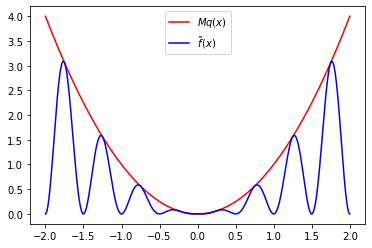

In [5]:
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f_tilde(x):
    return x**2 * np.sin(2*np.pi*x)**2

def q(x):
     return 3*x**2/16

M = 16.0/3.0

plt.figure()
x = np.linspace(-2, 2, 1000)
plt.plot(x, M*q(x), '-r', label=r'$Mq(x)$')
plt.plot(x, f_tilde(x), '-b', label=r'$\tilde f(x)$')
plt.legend()

$\star$ (a) (8 pts) Describe how to sample from $q(x)$ using $\texttt{npr.rand}$, and compute the mean and variance of the distribution.

> I answered it on an additional file.

(b) (4 pts) Complete the following codes to sample from $q(x)$ and verify the correctness.

In [6]:
# draw n samples from the distribution with PDF q(x).
def rand_q(n):
    ##########################################
    # put your code here
    unif = npr.rand(n)
    unif_transformed = np.cbrt(16*unif-8)

    return unif_transformed
    ##########################################
    
q_true_mean = 0 ######## put your answer here ############
q_true_var = 12/5 ######## put your answer here #############


n = 100000
x = rand_q(n)

print(f'true mean {q_true_mean}, empirical mean {x.mean()}')
print(f'true variance {q_true_var}, empirical variance {x.var()}')

true mean 0, empirical mean 0.004995406208450526
true variance 2.4, empirical variance 2.400622110201047


(c) (9 pts) Complete the following code to sample from $f_X(x)$ with rejection sampling using $q(x)$ as a proposal. Verify your implementation with the provided codes drawing histograms of samples and comparing empirical means and variances to numerically computed means and expectations.

numerical mean 0.0, empirical mean 7.573267262167e-06
numerical variance 2.3470250033370554, empirical variance 2.347791164018054


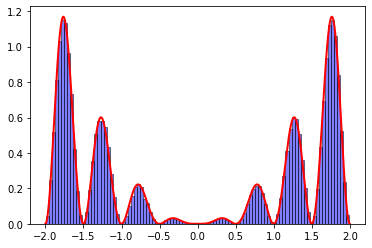

In [7]:
# draw a sample from f_X with rejection sampling.
def rand_f_rejection():
    ##########################################
    # put your code here
    while True:
        proposal = rand_q(1)
        unif = npr.rand(1)
        M = 16/3

        numerator = f_tilde(proposal)
        denominator = M * q(proposal)

        standard = numerator / denominator 

        if unif < standard:
            break

    return proposal
    ##########################################

# draw samples
n = 100000
x = np.array([rand_f_rejection() for _ in range(n)])

# verification by drawing empirical distribution

plt.hist(x, bins=100, density=True, facecolor='b', edgecolor='k', alpha=0.5);

# numerical integration for the normalization constant
Z = quad(f_tilde, -2, 2)[0]
tx = np.linspace(-2, 2, 1000)
plt.plot(tx, f_tilde(tx)/Z, '-r', linewidth=2.0)

# verification by comparing mean and variances
numerical_mean = quad(lambda x: x*f_tilde(x)/Z, -2, 2)[0]
numerical_var = quad(lambda x: x**2*f_tilde(x)/Z, -2, 2)[0] - numerical_mean**2

print(f'numerical mean {numerical_mean}, empirical mean {x.mean()}')
print(f'numerical variance {numerical_var}, empirical variance {x.var()}')

(d) (9 pts) Consider the following expecation of $X$,
$$
\mathbb{E}[g(X)] = \int_{-2}^2 g(x) f_X(x)\mathrm{d} x = \int_{-2}^2 g(x) \frac{\tilde f_X(x)}{Z}\mathrm{d} x.
$$
Complete the following code to estimating this expecation via self-normalized importance sampling. Use $q(x)$ implemented above as a proposal distribution.

In [8]:
# compute the approximation for the expectation E[g(X)] using n number of samples.
# g: target function to compute expectation
# n: number of samples being used
def SNIS(g, n):
    ##########################################
    # put your code here
    proposal = rand_q(n)
    
    ws = f_tilde(proposal) / q(proposal)
    norm_ws = np.sum(ws)
    ws_weighted = ws / norm_ws

    weighted_probs = ws_weighted * g(proposal)
    final_result = np.sum(weighted_probs)

    return final_result
    ##########################################

# verify your implementation using numerical integration
g = lambda x: np.log(np.abs(x) + 1.0)
n = 100000
snis_expec = SNIS(g, n)

numerical_expec = quad(lambda x: g(x)*f_tilde(x)/Z, -2, 2)[0]

print(f'Expectation via numerical integration {numerical_expec}, expectation via SNIS {snis_expec}')

Expectation via numerical integration 0.8974560004907551, expectation via SNIS 0.8970010429387429


## Problem 3 (20 pts)
Let $X$ be a $d$-dimensional categorical random varaible with Probability Mass Function (PMF)
$$
f_X(x) = \prod_{j=0}^{d-1} \pi_j^{\mathbf{1}[x = j]}.
$$
Using only $\texttt{npr.rand}$, complete the following code to draw samples from the categorical distribution. Verify the correctness of your implementation using the provide code.

In [9]:
# draw a sample from a categorical distribution with parameter pi
def rand_cat(pi):
    ##########################################
    # put your code here
    zero = np.array([0])
    cum_pi_modified = np.hstack((zero, np.cumsum(pi)))
    
    unif = npr.rand(1)
    standard = unif > cum_pi_modified

    idx = [idx for idx, tf in enumerate(standard) if tf == True][-1] # Get the idx of the last True

    return idx
    ##########################################

# verify the code using LLN
d = 5
pi = npr.rand(d)
pi = pi / pi.sum()

n = 100000
x = np.zeros(d)
for i in range(n):
    x[rand_cat(pi)] += 1

print(f'empirical mean {x/x.sum()}')
print(f'true mean {pi}')

empirical mean [0.01523 0.33662 0.07443 0.52062 0.0531 ]
true mean [0.01564104 0.33709201 0.07494161 0.51873978 0.05358556]


## Problem 4 (30 pts)
Consider a bivariate random variable $X = (X_1, X_2)$ with the following unnormalizing PDF:
$$
\tilde f_X(x_1, x_2) = \exp\bigg( - \bigg( x_1 - \frac{x_2^2}{4}\bigg)^2 - \frac{x_2^2}{4}\bigg).
$$
You can see a contour plot of the density by the following code.

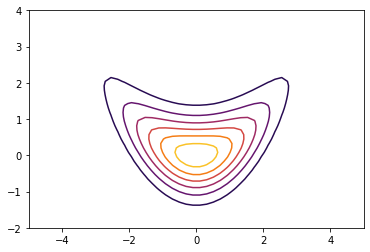

In [10]:
# x: n times 2 matrix or 2 dimensional vector
def log_f_tilde(x):
    if x.ndim == 2:
        x1, x2 = x[:,0], x[:,1]
    else:
        x1, x2 = x

    return -(x2 - x1**2/4)**2 - x1**2/4

def plot_density(alpha=1.0):
    nx, ny = 50, 50
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-2, 4, ny)
    xx, yy = np.meshgrid(x, y)
    z = np.exp(log_f_tilde(np.concatenate([xx.reshape((-1, 1)), yy.reshape((-1, 1))], -1)))
    plt.contour(x, y, z.reshape((nx, ny)), cmap='inferno', alpha=alpha)

plot_density()

We want to write a Metropolis-Hastings algorithm based Markov-chain Monte-Carlo sampler for this distribution. we will use a simple random walk Gaussian distribution as our proposal,
$$
q(x'|x) = \mathcal{N}(x' ; x, \sigma^2 I),
$$
where we fix $\sigma = 0.2$. Complete the following code to run the random walk Metropolis Hastings. Using the provided code, verify the correctness of your implementation by visualizing samples.

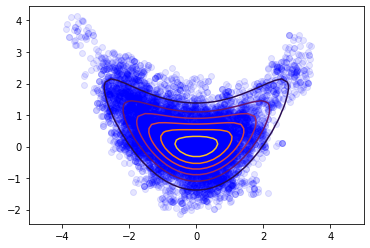

In [11]:
# propose a sample from the proposal distribution q(x' | x) = N(x' ; x, sigma^2*I)
def q_MH(x, sigma):
    ##########################################
    # put your code here
    ##########################################
    size = x.shape[0]
    cov = np.identity(size)*(sigma**2)
    
    x_prime = npr.multivariate_normal(x, cov, 1)[0]
    return x_prime

# run a random-walk Metropolis Hastings
# x0: initial sample
# num_samples: number of samples to collect
# sigma: variance for the proposal distribution
def RW_MH(x0, num_samples, sigma):
    ##########################################
    # put your code here
    from scipy.stats import multivariate_normal

    results = []
    size= x0.shape[0]
    covariance = np.identity(size)*(sigma**2)

    for i in range(num_samples):
        unif = npr.rand(1)
        x_prime = q_MH(x0, sigma)

        A_rhs_nominator = np.exp(log_f_tilde(x_prime)) * multivariate_normal.pdf(x0, mean=x_prime, cov=covariance)
        A_rhs_denominator = np.exp(log_f_tilde(x0)) * multivariate_normal.pdf(x_prime, mean=x0, cov=covariance)
        
        A_probs = min(1, A_rhs_nominator / A_rhs_denominator)

        if unif < A_probs:
            x0 = x_prime

        results.append(x0)

    results = np.vstack((results))

    return results
    ##########################################


# randomly initialize a chain
x0 = 0.01*npr.randn(2)
# collect 10000 samples from RW MH
x = RW_MH(x0, 10000, 0.2)

# visualize the samples
plot_density(alpha=1.0)
plt.scatter(x[:,0], x[:,1], alpha=0.1, color='b')